The exercises below are described further [HERE](https://www.overleaf.com/read/kzjggwqbfjwd)

 # Tests on PDA

In [1]:
import sys
sys.path[0:0] = ['../..','../../3rdparty'] # Put these at the head of the search path

from jove.SystemImports import *
from jove.DotBashers    import *
from jove.Def_md2mc     import *
from jove.Def_PDA       import *
from jove.Def_TM        import *

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(explore_pda)
help(run_pda)
help(classify_l_id_path)
help(h_run_pda)
help(interpret_w_eps)
help(step_pda)
help(suvivor_id)
help(term_id)
help(final_id)
help(cvt_str_to_sym)
help(is_surv_id)
help(subsumed)
help(is_term_id)
help(is_final_id)

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)



In [2]:
pda_a1_b2 = md2mc('''PDA
I : a, # ; cc# -> I
I : a, c ; ccc -> I
I : b, # ; b#  -> I
I : b, b ; bb  -> I
I : b, c ; ''  -> I
I : a, b ; ''  -> SeeIfMore

SeeIfMore : '', b ; ''  -> I
SeeIfMore : '', # ; c#  -> I
SeeIfMore : '', c ; cc  -> I

I : '', #; #  -> F
''')

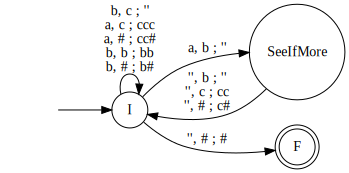

In [3]:
dotObj_pda(pda_a1_b2, FuseEdges = True)

In [4]:
explore_pda("aabbbbbabbba", pda_a1_b2)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aabbbbbabbba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aabbbbbabbba', '#')
->  ('I', 'abbbbbabbba', 'cc#')
->  ('I', 'bbbbbabbba', 'cccc#')
->  ('I', 'bbbbabbba', 'ccc#')
->  ('I', 'bbbabbba', 'cc#')
->  ('I', 'bbabbba', 'c#')
->  ('I', 'babbba', '#')
->  ('I', 'abbba', 'b#')
->  ('SeeIfMore', 'bbba', '#')
->  ('I', 'bbba', 'c#')
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('SeeIfMore', '', 'b#')
->  ('I', '', '#')
->  ('F', '', '#') .


In [5]:
a1b2_s = md2mc(''' 
PDA
!!---------------------------------------------------------------------------
!! This is a PDA that accepts all strings with twice as many b's as a's
!! That is, n_b = 2 * n_a must be satisfied
!! Recall this can happen when n_a = n_b = 0 (trivial case)
!!
!! Acceptance is required to be by empty stack
!! (see a1b2_accept_f.pda for a PDA that accepts by final state)
!!
!! PDA made by markdown will have # on top of stack (TOS)
!!
!! The basic algorithm is to convert a's to  two c's
!! Only c's and b's are allowed on the stack
!! But depending on the arrival order, we need to juggle what we put on TOS
!! For details, study the comments below
!!
!!---------------------------------------------------------------------------

I : '', # ; '' ->  I    !! In case the input string is empty, we satisfy trivially

I : a, # ; cc#  -> I    !! An a coming in with # on TOS : turn a into two c

I : a, b ; ''  ->  Try  !! An a coming in with a b on TOS: we don't know what lies below b
                        !! So entry Try state, but after consuming that one b

Try : '', b ; ''  -> I  !! In Try state we find another b; how handy; consume that also
                        !! Now we are back in state I
			
Try : '', c ; cc  -> I  !! In Try state, we face a c; so we have consumed only one b
                        !! Express deficit of a 'b' by stacking a c
			
Try : '', # ; c# -> I   !! We face a #; we have again consumed only one b
                        !! Express deficit of a 'b' by stacking a c
			
I : a, c ; ccc  -> I    !! In I, we face 'c' on TOS, so express deficit of two b
       	   	   	!! by stacking two c

I : b, # ; b#   -> I	!! b input when # is TOS turns into b stacked
I : b, b ; bb   -> I    !! b input when b is TOS turns into b stacked
I : b, c ; ''   -> I    !! b and c are even match

!!---------------------------------------------------------------------------
''')

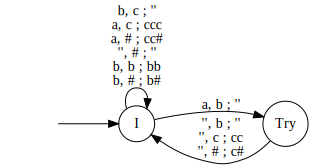

In [6]:
dotObj_pda(a1b2_s, FuseEdges=True) 

In [7]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [8]:
explore_pda("abb", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'abb', '#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [9]:
explore_pda("bab", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String bab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bab', '#')
->  ('I', 'ab', 'b#')
->  ('Try', 'b', '#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [10]:
explore_pda("bba", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String bba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('I', '', '') .


In [11]:
explore_pda("bbaabbbabaabbabbbb", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String bbaabbbabaabbabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'bbaabbbabaabbabbbb', '#')
->  ('I', 'baabbbabaabbabbbb', 'b#')
->  ('I', 'aabbbabaabbabbbb', 'bb#')
->  ('Try', 'abbbabaabbabbbb', 'b#')
->  ('I', 'abbbabaabbabbbb', '#')
->  ('I', 'bbbabaabbabbbb', 'cc#')
->  ('I', 'bbabaabbabbbb', 'c#')
->  ('I', 'babaabbabbbb', '#')
->  ('I', 'abaabbabbbb', 'b#')
->  ('Try', 'baabbabbbb', '#')
->  ('I', 'baabbabbbb', 'c#')
->  ('I', 'aabbabbbb', '#')
->  ('I', 'abbabbbb', 'cc#')
->  ('I', 'bbabbbb', 'cccc#')
->  ('I', 'babbbb', 'ccc#')
->  ('I', 'abbbb', 'cc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [12]:
explore_pda("babaababbbaabbbbbb", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String babaababbbaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'babaababbbaabbbbbb', '#')
->  ('I', 'abaababbbaabbbbbb', 'b#')
->  ('Try', 'baababbbaabbbbbb', '#')
->  ('I', 'baababbbaabbbbbb', 'c#')
->  ('I', 'aababbbaabbbbbb', '#')
->  ('I', 'ababbbaabbbbbb', 'cc#')
->  ('I', 'babbbaabbbbbb', 'cccc#')
->  ('I', 'abbbaabbbbbb', 'ccc#')
->  ('I', 'bbbaabbbbbb', 'ccccc#')
->  ('I', 'bbaabbbbbb', 'cccc#')
->  ('I', 'baabbbbbb', 'ccc#')
->  ('I', 'aabbbbbb', 'cc#')
->  ('I', 'abbbbbb', 'cccc#')
->  ('I', 'bbbbbb', 'cccccc#')
->  ('I', 'bbbbb', 'ccccc#')
->  ('I', 'bbbb', 'cccc#')
->  ('I', 'bbb', 'ccc#')
->  ('I', 'bb', 'cc#')
->  ('I', 'b', 'c#')
->  ('I', '', '#')
->  ('I', '', '') .


In [13]:
explore_pda("abbaababbbabbbbbba", a1b2_s, acceptance='ACCEPT_S')

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String abbaababbbabbbbbba accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('I', '', '')
Reached as follows:
->  ('I', 'abbaababbbabbbbbba', '#')
->  ('I', 'bbaababbbabbbbbba', 'cc#')
->  ('I', 'baababbbabbbbbba', 'c#')
->  ('I', 'aababbbabbbbbba', '#')
->  ('I', 'ababbbabbbbbba', 'cc#')
->  ('I', 'babbbabbbbbba', 'cccc#')
->  ('I', 'abbbabbbbbba', 'ccc#')
->  ('I', 'bbbabbbbbba', 'ccccc#')
->  ('I', 'bbabbbbbba', 'cccc#')
->  ('I', 'babbbbbba', 'ccc#')
->  ('I', 'abbbbbba', 'cc#')
->  ('I', 'bbbbbba', 'cccc#')
->  ('I', 'bbbbba', 'ccc#')
->  ('I', 'bbbba', 'cc#')
->  ('I', 'bbba', 'c#')
->  ('I', 'bba', '#')
->  ('I', 'ba', 'b#')
->  ('I', 'a', 'bb#')
->  ('Try', '', 'b#')
->  ('I', '', '#')
->  ('I', '', '') .


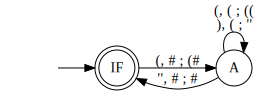

In [14]:
pdaDyck = md2mc('''PDA
IF : (, #; (# -> A
A  : (, (; (( -> A
A  : ), (; '' -> A
A  : '',#; #  -> IF
''')
DOpdaDyck = dotObj_pda(pdaDyck, FuseEdges=True)
DOpdaDyck

In [15]:
explore_pda("", pdaDyck)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [16]:
explore_pda("()", pdaDyck)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String () accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()', '#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [17]:
explore_pda("()()(())", pdaDyck)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String ()()(()) accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '()()(())', '#')
->  ('A', ')()(())', '(#')
->  ('A', '()(())', '#')
->  ('IF', '()(())', '#')
->  ('A', ')(())', '(#')
->  ('A', '(())', '#')
->  ('IF', '(())', '#')
->  ('A', '())', '(#')
->  ('A', '))', '((#')
->  ('A', ')', '(#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [18]:
explore_pda("()()(()", pdaDyck)  

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String ()()(() rejected by your PDA :-(
Visited states are:
{('A', '()(()', '#'), ('A', ')(()', '(#'), ('IF', '(()', '#'), ('A', ')', '((#'), ('IF', '()(()', '#'), ('A', ')()(()', '(#'), ('A', '(()', '#'), ('A', '', '(#'), ('IF', '()()(()', '#'), ('A', '()', '(#')}


na = nb + nc using pda

In [19]:
# Parsing an arithmetic expression
pdaE = md2mc('''PDA
!!E -> E+T | T
!!T -> T*F | F
!!F -> 2 | 3 | ~F | (E)
I : '', #  ; E#  -> M
M : '', E  ; E+T -> M
M : '', E  ; T   -> M
M : '', T  ; T*F -> M
M : '', T  ; F   -> M
M : '', F  ; 2   -> M
M : '', F  ; 3   -> M
M : '', F  ; ~F  -> M
M : '', F  ; (E) -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

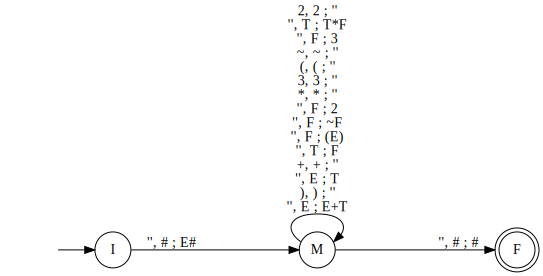

In [20]:
DOpdaE = dotObj_pda(pdaE, FuseEdges=True)
DOpdaE

In [21]:
explore_pda("2+2*3", pdaE, STKMAX=7)

*** Exploring wrt STKMAX=  7 ; increase it if needed ***
*** Exploring wrt STKMAX =  7 ; increase it if needed ***
String 2+2*3 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '2+2*3', '#')
->  ('M', '2+2*3', 'E#')
->  ('M', '2+2*3', 'E+T#')
->  ('M', '2+2*3', 'T+T#')
->  ('M', '2+2*3', 'F+T#')
->  ('M', '2+2*3', '2+T#')
->  ('M', '+2*3', '+T#')
->  ('M', '2*3', 'T#')
->  ('M', '2*3', 'T*F#')
->  ('M', '2*3', 'F*F#')
->  ('M', '2*3', '2*F#')
->  ('M', '*3', '*F#')
->  ('M', '3', 'F#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [22]:
# Parsing an arithmetic expression
pdaEamb = md2mc('''PDA
!!E -> E * E | E + E | ~E | ( E ) | 2 | 3
I : '', #  ; E#  -> M
M : '', E  ; ~E  -> M
M : '', E  ; E+E -> M
M : '', E  ; E*E -> M
M : '', E  ; (E) -> M
M : '', E  ; 2   -> M
M : '', E  ; 3   -> M
M : ~,  ~  ; ''  -> M
M : 2,  2  ; ''  -> M
M : 3,  3  ; ''  -> M
M : (,  (  ; ''  -> M
M : ),  )  ; ''  -> M
M : +,  +  ; ''  -> M
M : *,  *  ; ''  -> M
M : '', #  ; #   -> F
'''
)

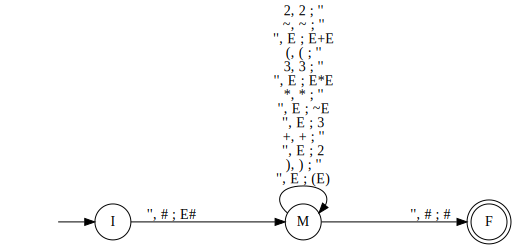

In [23]:
DOpdaEamb = dotObj_pda(pdaEamb, FuseEdges=True)
DOpdaEamb

In [24]:
explore_pda("3+2*3", pdaEamb, STKMAX=5)

*** Exploring wrt STKMAX=  5 ; increase it if needed ***
*** Exploring wrt STKMAX =  5 ; increase it if needed ***
String 3+2*3 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E+E#')
->  ('M', '3+2*3', '3+E#')
->  ('M', '+2*3', '+E#')
->  ('M', '2*3', 'E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '3+2*3', '#')
->  ('M', '3+2*3', 'E#')
->  ('M', '3+2*3', 'E*E#')
->  ('M', '3+2*3', 'E+E*E#')
->  ('M', '3+2*3', '3+E*E#')
->  ('M', '+2*3', '+E*E#')
->  ('M', '2*3', 'E*E#')
->  ('M', '2*3', '2*E#')
->  ('M', '*3', '*E#')
->  ('M', '3', 'E#')
->  ('M', '3', '3#')
->  ('M', '', '#')
->  ('F', '', '#') .


In [25]:
3

3

In [26]:
eqpda=md2mc('''
PDA
I : a,#;a# | b,#;b# | a,a;aa | b,b;bb -> I
I : a,b;'' | b,a;'' -> I
I : '',#; # -> F
'''
           )

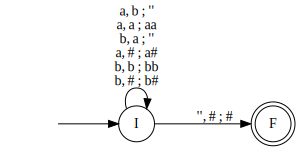

In [27]:
dotObj_pda(eqpda, FuseEdges=True)

In [28]:
explore_pda("aaaaaabbbbbb",eqpda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aaaaaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'aaaaaabbbbbb', '#')
->  ('I', 'aaaaabbbbbb', 'a#')
->  ('I', 'aaaabbbbbb', 'aa#')
->  ('I', 'aaabbbbbb', 'aaa#')
->  ('I', 'aabbbbbb', 'aaaa#')
->  ('I', 'abbbbbb', 'aaaaa#')
->  ('I', 'bbbbbb', 'aaaaaa#')
->  ('I', 'bbbbb', 'aaaaa#')
->  ('I', 'bbbb', 'aaaa#')
->  ('I', 'bbb', 'aaa#')
->  ('I', 'bb', 'aa#')
->  ('I', 'b', 'a#')
->  ('I', '', '#')
->  ('F', '', '#') .


In [29]:
explore_pda("",eqpda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '', '#')
->  ('F', '', '#') .


In [30]:
explore_pda("bbabaaabaabbbbaa",eqpda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String bbabaaabaabbbbaa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'bbabaaabaabbbbaa', '#')
->  ('I', 'babaaabaabbbbaa', 'b#')
->  ('I', 'abaaabaabbbbaa', 'bb#')
->  ('I', 'baaabaabbbbaa', 'b#')
->  ('I', 'aaabaabbbbaa', 'bb#')
->  ('I', 'aabaabbbbaa', 'b#')
->  ('I', 'abaabbbbaa', '#')
->  ('I', 'baabbbbaa', 'a#')
->  ('I', 'aabbbbaa', '#')
->  ('I', 'abbbbaa', 'a#')
->  ('I', 'bbbbaa', 'aa#')
->  ('I', 'bbbaa', 'a#')
->  ('I', 'bbaa', '#')
->  ('I', 'baa', 'b#')
->  ('I', 'aa', 'bb#')
->  ('I', 'a', 'b#')
->  ('I', '', '#')
->  ('F', '', '#') .


In [31]:
explore_pda("aaaaaabbbbb",eqpda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aaaaaabbbbb rejected by your PDA :-(
Visited states are:
{('I', 'bbbbb', 'aaaaaa#'), ('I', 'bbb', 'aaaa#'), ('I', 'aaaaabbbbb', 'a#'), ('I', 'aabbbbb', 'aaaa#'), ('I', 'bb', 'aaa#'), ('I', 'aaaabbbbb', 'aa#'), ('I', 'abbbbb', 'aaaaa#'), ('I', 'aaabbbbb', 'aaa#'), ('I', 'aaaaaabbbbb', '#'), ('I', 'b', 'aa#'), ('I', '', 'a#'), ('I', 'bbbb', 'aaaaa#'), ('F', 'aaaaaabbbbb', '#')}


In [32]:
chyr1pda = md2mc('''
PDA
I  : a,  # ; aa# -> I  !! bottom of the stack, push two "a"'s
I  : b,  # ; b#  -> I  !! bottom of the stack, push one "b"
I  : a,  a ; aaa -> I  !! another incoming a, put the a old "a" back and push an additional two a's
I  : b,  b ; bb  -> I  !! another incoming b, put the old "b" back and push a "b"

I  : a,  b ; ''  -> AB !! since there must be two "a"'s for every "b", remove the first "b"
AB : '', # ; a#  -> I  !! the bottom of the stack was reach with an additional "a" to add
AB : '', a ; aa  -> I  !! this really should never happen, but it's here for safety
AB : '', b ; ''  -> I  !! there was another "b", cancel this one as well

I  : b,  a ; ''  -> I  !! cancel the "b" with the "a"
I  : '', # ; #   -> F  !! the "a"'s and "b"'s cancel correctly, all done and accept!

''')

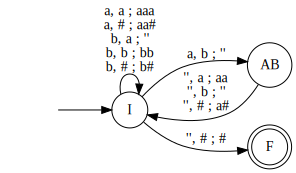

In [33]:
dotObj_pda(chyr1pda, FuseEdges=True)

In [34]:
explore_pda("babbaabbabbb",chyr1pda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String babbaabbabbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'babbaabbabbb', '#')
->  ('I', 'abbaabbabbb', 'b#')
->  ('AB', 'bbaabbabbb', '#')
->  ('I', 'bbaabbabbb', 'a#')
->  ('I', 'baabbabbb', '#')
->  ('I', 'aabbabbb', 'b#')
->  ('AB', 'abbabbb', '#')
->  ('I', 'abbabbb', 'a#')
->  ('I', 'bbabbb', 'aaa#')
->  ('I', 'babbb', 'aa#')
->  ('I', 'abbb', 'a#')
->  ('I', 'bbb', 'aaa#')
->  ('I', 'bb', 'aa#')
->  ('I', 'b', 'a#')
->  ('I', '', '#')
->  ('F', '', '#') .


In [35]:
explore_pda("babbab",chyr1pda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String babbab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'babbab', '#')
->  ('I', 'abbab', 'b#')
->  ('AB', 'bbab', '#')
->  ('I', 'bbab', 'a#')
->  ('I', 'bab', '#')
->  ('I', 'ab', 'b#')
->  ('AB', 'b', '#')
->  ('I', 'b', 'a#')
->  ('I', '', '#')
->  ('F', '', '#') .


In [36]:
chyr2pda = md2mc('''
PDA
I  : a,  # ; aa# -> I  !! bottom of the stack, push two "a"'s
I  : b,  # ; b#  -> I  !! bottom of the stack, push one "b"
I  : a,  a ; aaa -> I  !! another incoming a, put the a old "a" back and push an additional two a's
I  : b,  b ; bb  -> I  !! another incoming b, put the old "b" back and push a "b"

I  : a,  b ; ''  -> AB !! since there must be two "a"'s for every "b", remove the first "b"
AB : '', # ; a#  -> I  !! the bottom of the stack was reach with an additional "a" to add
AB : '', a ; aa  -> I  !! this really should never happen, but it's here for safety
AB : '', b ; ''  -> I  !! there was another "b", cancel this one as well

I  : b,  a ; ''  -> I  !! cancel the "b" with the "a"
I  : '', # ; #   -> F  !! the "a"'s and "b"'s cancel correctly, all done and accept!

''')

In [37]:
explore_pda("babbab",chyr2pda)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String babbab accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', 'babbab', '#')
->  ('I', 'abbab', 'b#')
->  ('AB', 'bbab', '#')
->  ('I', 'bbab', 'a#')
->  ('I', 'bab', '#')
->  ('I', 'ab', 'b#')
->  ('AB', 'b', '#')
->  ('I', 'b', 'a#')
->  ('I', '', '#')
->  ('F', '', '#') .


## #1 > #0


In [38]:
onesGTzeros = md2mc('''PDA
I : 1,#;1# | 0,#;0  -> I
I : 1,1;11 | 0,0;00 -> I
I : 1,0;'' | 0,1;'' -> I
I : '',1;''         -> FryMyLuck
FryMyLuck : '',1;'' -> FryMyLuck
FryMyLuck : '',#;#  -> FryMyLuck
''')

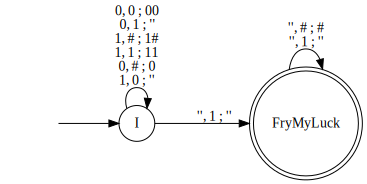

In [39]:
dotObj_pda(onesGTzeros, FuseEdges=True)

In [40]:
explore_pda("11011011011", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 11011011011 accepted by your PDA in 6 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '1111#')
Reached as follows:
->  ('I', '11011011011', '#')
->  ('I', '1011011011', '1#')
->  ('I', '011011011', '11#')
->  ('I', '11011011', '1#')
->  ('I', '1011011', '11#')
->  ('I', '011011', '111#')
->  ('I', '11011', '11#')
->  ('I', '1011', '111#')
->  ('I', '011', '1111#')
->  ('I', '11', '111#')
->  ('I', '1', '1111#')
->  ('I', '', '11111#')
->  ('FryMyLuck', '', '1111#') .
Final state  ('FryMyLuck', '', '111#')
Reached as follows:
->  ('I', '11011011011', '#')
->  ('I', '1011011011', '1#')
->  ('I', '011011011', '11#')
->  ('I', '11011011', '1#')
->  ('I', '1011011', '11#')
->  ('I', '011011', '111#')
->  ('I', '11011', '11#')
->  ('I', '1011', '111#')
->  ('I', '011', '1111#')
->  ('I', '11', '111#')
->  ('I', '1', '1111#')
->  ('I', '', '11111#')
->  ('FryM

In [41]:
explore_pda("1101101101100", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 1101101101100 accepted by your PDA in 4 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '11#')
Reached as follows:
->  ('I', '1101101101100', '#')
->  ('I', '101101101100', '1#')
->  ('I', '01101101100', '11#')
->  ('I', '1101101100', '1#')
->  ('I', '101101100', '11#')
->  ('I', '01101100', '111#')
->  ('I', '1101100', '11#')
->  ('I', '101100', '111#')
->  ('I', '01100', '1111#')
->  ('I', '1100', '111#')
->  ('I', '100', '1111#')
->  ('I', '00', '11111#')
->  ('I', '0', '1111#')
->  ('I', '', '111#')
->  ('FryMyLuck', '', '11#') .
Final state  ('FryMyLuck', '', '1#')
Reached as follows:
->  ('I', '1101101101100', '#')
->  ('I', '101101101100', '1#')
->  ('I', '01101101100', '11#')
->  ('I', '1101101100', '1#')
->  ('I', '101101100', '11#')
->  ('I', '01101100', '111#')
->  ('I', '1101100', '11#')
->  ('I', '101100', '111#')
->  ('I', '01100', '1111#'

In [42]:
explore_pda("110110110110000", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 110110110110000 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '110110110110000', '#')
->  ('I', '10110110110000', '1#')
->  ('I', '0110110110000', '11#')
->  ('I', '110110110000', '1#')
->  ('I', '10110110000', '11#')
->  ('I', '0110110000', '111#')
->  ('I', '110110000', '11#')
->  ('I', '10110000', '111#')
->  ('I', '0110000', '1111#')
->  ('I', '110000', '111#')
->  ('I', '10000', '1111#')
->  ('I', '0000', '11111#')
->  ('I', '000', '1111#')
->  ('I', '00', '111#')
->  ('I', '0', '11#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#') .
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '110110110110000', '#')
->  ('I', '10110110110000', '1#')
->  ('I', '0110110110000', '11#')
->  ('I', '110110110000', '1#')
->  ('I', '10110110000', '11#')
->  ('I', '0110110000', '111#')
-> 

In [43]:
explore_pda("1010110110110000", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 1010110110110000 rejected by your PDA :-(
Visited states are:
{('FryMyLuck', '000', '#'), ('FryMyLuck', '10110000', '#'), ('FryMyLuck', '0110110000', '1#'), ('FryMyLuck', '0000', '1#'), ('FryMyLuck', '00', '1#'), ('FryMyLuck', '0110000', '#'), ('FryMyLuck', '10000', '1#'), ('I', '', '#'), ('I', '00', '11#'), ('I', '0110000', '111#'), ('I', '0000', '1111#'), ('FryMyLuck', '0110000', '11#'), ('FryMyLuck', '010110110110000', '#'), ('FryMyLuck', '00', '#'), ('I', '110110110000', '#'), ('FryMyLuck', '10000', '#'), ('I', '010110110110000', '1#'), ('FryMyLuck', '110110000', '#'), ('FryMyLuck', '10110110000', '#'), ('FryMyLuck', '10000', '11#'), ('FryMyLuck', '0000', '111#'), ('FryMyLuck', '0000', '11#'), ('I', '10110000', '11#'), ('I', '1010110110110000', '#'), ('I', '0110110000', '11#'), ('I', '110000', '11#'), ('FryMyLuck', '110000', '#'), ('FryMyLuck', '000', '1#'), ('F

In [44]:
explore_pda("10101101101100100", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 10101101101100100 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '10101101101100100', '#')
->  ('I', '0101101101100100', '1#')
->  ('I', '101101101100100', '#')
->  ('I', '01101101100100', '1#')
->  ('I', '1101101100100', '#')
->  ('I', '101101100100', '1#')
->  ('I', '01101100100', '11#')
->  ('I', '1101100100', '1#')
->  ('I', '101100100', '11#')
->  ('I', '01100100', '111#')
->  ('I', '1100100', '11#')
->  ('I', '100100', '111#')
->  ('I', '00100', '1111#')
->  ('I', '0100', '111#')
->  ('I', '100', '11#')
->  ('I', '00', '111#')
->  ('I', '0', '11#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#') .
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '10101101101100100', '#')
->  ('I', '0101101101100100', '1#')
->  ('I', '101101101100100', '#')
->  ('I', '01101101100100', '1#

In [45]:
explore_pda("1", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 1 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '1', '#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#') .
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '1', '#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#')
->  ('FryMyLuck', '', '#') .


In [46]:
explore_pda("0", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 0 rejected by your PDA :-(
Visited states are:
{('I', '0', '#'), ('I', '', '0')}


In [47]:
explore_pda("", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String  rejected by your PDA :-(
Visited states are:
{('I', '', '#')}


In [48]:
explore_pda("1111", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 1111 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '111#')
Reached as follows:
->  ('I', '1111', '#')
->  ('I', '111', '1#')
->  ('I', '11', '11#')
->  ('I', '1', '111#')
->  ('I', '', '1111#')
->  ('FryMyLuck', '', '111#') .
Final state  ('FryMyLuck', '', '11#')
Reached as follows:
->  ('I', '1111', '#')
->  ('I', '111', '1#')
->  ('I', '11', '11#')
->  ('I', '1', '111#')
->  ('I', '', '1111#')
->  ('FryMyLuck', '', '111#')
->  ('FryMyLuck', '', '11#') .
Final state  ('FryMyLuck', '', '1#')
Reached as follows:
->  ('I', '1111', '#')
->  ('I', '111', '1#')
->  ('I', '11', '11#')
->  ('I', '1', '111#')
->  ('I', '', '1111#')
->  ('FryMyLuck', '', '111#')
->  ('FryMyLuck', '', '11#')
->  ('FryMyLuck', '', '1#') .
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '1111', '#')
->  ('I', '111', '1#')
->  ('I', '11'

In [49]:
explore_pda("1010101", onesGTzeros)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String 1010101 accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '1010101', '#')
->  ('I', '010101', '1#')
->  ('I', '10101', '#')
->  ('I', '0101', '1#')
->  ('I', '101', '#')
->  ('I', '01', '1#')
->  ('I', '1', '#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#') .
Final state  ('FryMyLuck', '', '#')
Reached as follows:
->  ('I', '1010101', '#')
->  ('I', '010101', '1#')
->  ('I', '10101', '#')
->  ('I', '0101', '1#')
->  ('I', '101', '#')
->  ('I', '01', '1#')
->  ('I', '1', '#')
->  ('I', '', '1#')
->  ('FryMyLuck', '', '#')
->  ('FryMyLuck', '', '#') .


In [50]:
'''
S -> A | AS
A -> E1E
E -> 0E1E | 1E0E | ''
'''

"\nS -> A | AS\nA -> E1E\nE -> 0E1E | 1E0E | ''\n"

In [51]:
pda1GT0 = md2mc('''
PDA

I : '' , # ; S# -> L

L : '' , S ; A  -> L

L : '' , S ; AS -> L

L : '' , A ; E1E -> L

L : '' , E ; 0E1E -> L

L : '' , E ; 1E0E -> L

L : '' , E ; ''   -> L

L : 0  , 0 ; ''   -> L

L : 1  , 1 ; ''   -> L

L : '' , # ; #    -> F

''')

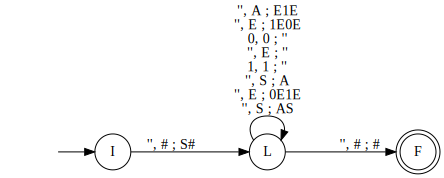

In [52]:
dotObj_pda(pda1GT0, FuseEdges=True)

In [53]:
help(explore_pda)

Help on function explore_pda in module jove.Def_PDA:

explore_pda(inp, P, acceptance='ACCEPT_F', STKMAX=6, chatty=False)
    A handy routine to print the result of run_pda plus making 
    future extensions to explore run-results.



In [54]:
explore_pda("1", pda1GT0, STKMAX = 8 )

*** Exploring wrt STKMAX=  8 ; increase it if needed ***
*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 1 accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1', '#')
->  ('L', '1', 'S#')
->  ('L', '1', 'A#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 'E#')
->  ('L', '', '#')
->  ('F', '', '#') .


In [55]:
explore_pda("10101", pda1GT0, STKMAX = 8 )

*** Exploring wrt STKMAX=  8 ; increase it if needed ***
*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 10101 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '10101', '#')
->  ('L', '10101', 'S#')
->  ('L', '10101', 'A#')
->  ('L', '10101', 'E1E#')
->  ('L', '10101', '1E#')
->  ('L', '0101', 'E#')
->  ('L', '0101', '0E1E#')
->  ('L', '101', 'E1E#')
->  ('L', '101', '1E#')
->  ('L', '01', 'E#')
->  ('L', '01', '0E1E#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 'E#')
->  ('L', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '10101', '#')
->  ('L', '10101', 'S#')
->  ('L', '10101', 'A#')
->  ('L', '10101', 'E1E#')
->  ('L', '10101', '1E#')
->  ('L', '0101', 'E#')
->  ('L', '0101', '0E1E#')
->  ('L', '101', 'E1E#')
->  ('L', '101', '1E0E1E#')
->  ('L', '01', 'E0E1E#')
->  ('L', '01', '0E1E#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 

In [56]:
explore_pda("1010101", pda1GT0, STKMAX = 8 )

*** Exploring wrt STKMAX=  8 ; increase it if needed ***
*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 1010101 accepted by your PDA in 14 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1010101', '#')
->  ('L', '1010101', 'S#')
->  ('L', '1010101', 'A#')
->  ('L', '1010101', 'E1E#')
->  ('L', '1010101', '1E#')
->  ('L', '010101', 'E#')
->  ('L', '010101', '0E1E#')
->  ('L', '10101', 'E1E#')
->  ('L', '10101', '1E#')
->  ('L', '0101', 'E#')
->  ('L', '0101', '0E1E#')
->  ('L', '101', 'E1E#')
->  ('L', '101', '1E#')
->  ('L', '01', 'E#')
->  ('L', '01', '0E1E#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 'E#')
->  ('L', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '1010101', '#')
->  ('L', '1010101', 'S#')
->  ('L', '1010101', 'A#')
->  ('L', '1010101', 'E1E#')
->  ('L', '1010101', '1E#')
->  ('L', '010101', 'E#')
->  ('L', '010101', '0E1E#')
->  ('L', '10101', 'E1E#')
-

In [57]:
explore_pda("10101", pda1GT0, STKMAX = 8 )

*** Exploring wrt STKMAX=  8 ; increase it if needed ***
*** Exploring wrt STKMAX =  8 ; increase it if needed ***
String 10101 accepted by your PDA in 5 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '10101', '#')
->  ('L', '10101', 'S#')
->  ('L', '10101', 'A#')
->  ('L', '10101', 'E1E#')
->  ('L', '10101', '1E#')
->  ('L', '0101', 'E#')
->  ('L', '0101', '0E1E#')
->  ('L', '101', 'E1E#')
->  ('L', '101', '1E#')
->  ('L', '01', 'E#')
->  ('L', '01', '0E1E#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 'E#')
->  ('L', '', '#')
->  ('F', '', '#') .
Final state  ('F', '', '#')
Reached as follows:
->  ('I', '10101', '#')
->  ('L', '10101', 'S#')
->  ('L', '10101', 'A#')
->  ('L', '10101', 'E1E#')
->  ('L', '10101', '1E#')
->  ('L', '0101', 'E#')
->  ('L', '0101', '0E1E#')
->  ('L', '101', 'E1E#')
->  ('L', '101', '1E0E1E#')
->  ('L', '01', 'E0E1E#')
->  ('L', '01', '0E1E#')
->  ('L', '1', 'E1E#')
->  ('L', '1', '1E#')
->  ('L', '', 

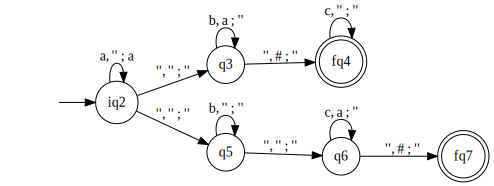

In [58]:
f27sip = md2mc('''
PDA 
!!---------------------------------------
!! This is a PDA From Sipser's book
!! This matches a's and b's ignoring c's
!! or matches a's and c's, ignoring b's 
!! in the middle. Thus, the language is
!! a^m b^m c^n or a^m b^n c^m
!!---------------------------------------

!!---------------------------------------------------------------------------
!! State: in , sin ; spush -> tostates !! comment
!!---------------------------------------------------------------------------
iq2    : a  , ''  ; a     -> iq2      !!  stack a's
iq2    : '' , ''  ; ''    -> q3,q5    !!  split non-det for a^m b^m c^n (q3)
                                      !!  or a^m b^n c^m (q5)
			     
q3     : b  , a   ; ''    -> q3       !!  match b's against a's
q3     : '' , #   ; ''    -> fq4      !!  hope for acceptance when # surfaces

fq4    : c  , ''  ; ''    -> fq4      !!  be happy so long as c's come
                                      !!  will choke and reject if anything
			              !!  other than c's come

q5     : b  , ''  ; ''    -> q5       !!  here, we are going to punt over b's
q5     : '' , ''  ; ''    -> q6       !!  and non-det decide to honor c's matching
                                      !!  against a's

q6     : c  , a   ; ''    -> q6       !!  OK to match so long as c's keep coming
q6     : '' , #   ; ''    -> fq7      !!  when # surfaces, be ready to accept in
                                      !!  state fq7. However, anything else coming in
			                          !!  now will foil match and cause rejection.
!!---------------------------------------------------------------------------
''')
DOf27sip = dotObj_pda(f27sip, FuseEdges=True)
DOf27sip

In [59]:
explore_pda("aaabbbccc", f27sip)

*** Exploring wrt STKMAX=  6 ; increase it if needed ***
*** Exploring wrt STKMAX =  6 ; increase it if needed ***
String aaabbbccc accepted by your PDA in 2 ways :-) 
Here are the ways: 
Final state  ('fq4', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q3', 'bbbccc', 'aaa#')
->  ('q3', 'bbccc', 'aa#')
->  ('q3', 'bccc', 'a#')
->  ('q3', 'ccc', '#')
->  ('fq4', 'ccc', '')
->  ('fq4', 'cc', '')
->  ('fq4', 'c', '')
->  ('fq4', '', '') .
Final state  ('fq7', '', '')
Reached as follows:
->  ('iq2', 'aaabbbccc', '#')
->  ('iq2', 'aabbbccc', 'a#')
->  ('iq2', 'abbbccc', 'aa#')
->  ('iq2', 'bbbccc', 'aaa#')
->  ('q5', 'bbbccc', 'aaa#')
->  ('q5', 'bbccc', 'aaa#')
->  ('q5', 'bccc', 'aaa#')
->  ('q5', 'ccc', 'aaa#')
->  ('q6', 'ccc', 'aaa#')
->  ('q6', 'cc', 'aa#')
->  ('q6', 'c', 'a#')
->  ('q6', '', '#')
->  ('fq7', '', '') .


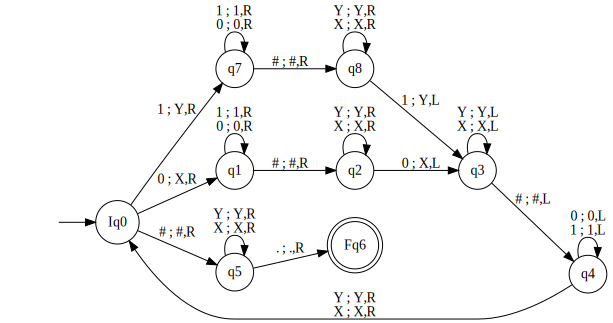

In [60]:
wpw_tm = md2mc('''
TM
!!---------------------------------------------------------------------------
!! This is a DTM for recognizing strings of the form w#w where w is in {0,1}*
!! The presence of the "#" serves as the midpoint-marker, thus allowing the
!! TM to deterministically match around it.
!! 
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Iq0     : 0  ; X  , R  -> q1      !! All 0s are converted to X, and matching
	       	       	  	  !! 0s are then sought to the right of the #

Iq0     : 1  ; Y  , R  -> q7      !! All 1s are converted to Y, and matching
	       	       	  	  !! 1s are then sought to the right of the #				  
				  
Iq0     : #  ; #  , R  -> q5      !! If we see # rightaway, we are in the
	       	       	  	  !! situation of having to match eps # eps

!!---				  
q5	: X ; X,R | Y ; Y,R -> q5 !! In q5, we skip over X and Y (an equal number
	      	      	       	  !! of X and Y lie to the left of the #)

q5      : .  ; .  , R  -> Fq6	  !! .. and we accept when we see a blank (.)
!!---				  				  

q1      : 0 ; 0,R | 1 ; 1,R -> q1 !! In q1, skip over the remaining 0s and 1s

q1      : #  ; #  , R  -> q2      !! But upon seeing a #, look for a matching
	       	       	  	  !! 0 (since we are in q2, we know this).

q2      : X ; X,R | Y ; Y,R -> q2 !! All X and Y are "past stuff" to skip over

q2      : 0  ; X  , L  -> q3      !! When we find a matching 0, turn that to
	       	       	  	  !! an X, and sweep left to do the next pass
				  
q3      : X ; X,L | Y ; Y,L -> q3 !! In q3, we move over all past X, Y

q3      : #  ; #  , L  -> q4      !! but when we reach the middle marker, we
	       	       	  	  !! know that the next action is to seek the
				  !! next unprocessed 0 or 1
				  
q4      : 0 ; 0,L | 1 ; 1,L -> q4 !! In q4, wait till we hit the leftmost 0/1

q4      : X ; X,R | Y ; Y,R -> Iq0 !! When we hit an X or Y, we know that we've
 	       	       	           !! found the leftmost 0/1. Another pass begins.

!!---				  
q7      : 0 ; 0,R | 1 ; 1,R -> q7 !! q7 is similar to q1

q7      : #  ; #  , R  -> q8      !! and q8 is similar to q2

q8      : X ; X,R | Y ; Y,R -> q8 

q8      : 1  ; Y  , L  -> q3      



!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------

''')
    
dotObj_tm(wpw_tm, FuseEdges=True)

In [61]:
explore_tm(wpw_tm, "010#010", 33)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq6', 8, 'XYX#XYX........', 1)
 via .. 
 ->('Iq0', 0, '010#010', 33)
 ->('q1', 1, 'X10#010', 32)
 ->('q1', 2, 'X10#010', 31)
 ->('q1', 3, 'X10#010', 30)
 ->('q2', 4, 'X10#010', 29)
 ->('q3', 3, 'X10#X10', 28)
 ->('q4', 2, 'X10#X10', 27)
 ->('q4', 1, 'X10#X10', 26)
 ->('q4', 0, 'X10#X10', 25)
 ->('Iq0', 1, 'X10#X10', 24)
 ->('q7', 2, 'XY0#X10', 23)
 ->('q7', 3, 'XY0#X10', 22)
 ->('q8', 4, 'XY0#X10', 21)
 ->('q8', 5, 'XY0#X10', 20)
 ->('q3', 4, 'XY0#XY0', 19)
 ->('q3', 3, 'XY0#XY0', 18)
 ->('q4', 2, 'XY0#XY0', 17)
 ->('q4', 1, 'XY0#XY0', 16)
 ->('Iq0', 2, 'XY0#XY0', 15)
 ->('q1', 3, 'XYX#XY0', 14)
 ->('q2', 4, 'XYX#XY0', 13)
 ->('q2', 5, 'XYX#XY0', 12)
 ->('q2', 6, 'XYX#XY0', 11)
 ->('q3', 5, 'XYX#XYX', 10)
 ->('q3', 4, 'XYX#XYX', 9)
 ->('q3', 3, 'XYX#XYX', 8)
 ->('q4', 2, 'XYX#XYX', 7)
 ->('Iq0', 3, 'XYX#XYX', 6)
 ->('q5', 4, 'XYX#XYX', 5)
 ->('q5', 5, 'XYX#XYX', 4)
 ->('q5', 6, 'XYX#XYX', 3)
 ->('q

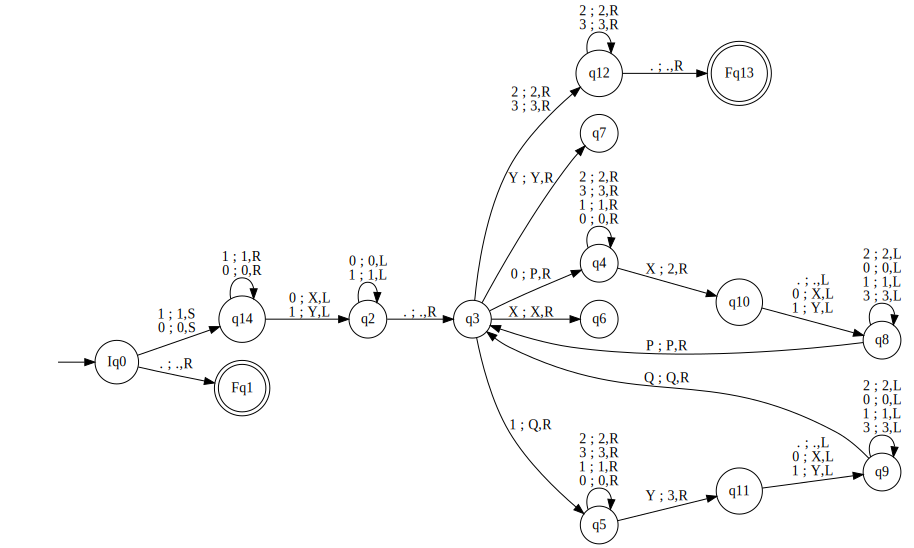

In [62]:
ww_ndtm = md2mc('''
TM 
!!---------------------------------------------------------------------------
!! This is a TM for ww processing. Guesses midpoint using nondet.
!! 
!!---------------------------------------------------------------------------

!!---------------------------------------------------------------------------
!! State : rd ; wr , mv -> tostates !! comment
!!---------------------------------------------------------------------------

Iq0     : 0  ; 0  , S  -> q14      !! This simulates the TM taking a guess
Iq0     : 1  ; 1  , S  -> q14      !! that it hasn't seen the midpoint. It
                                   !! moves to q14

Iq0     : .  ; .  , R  -> Fq1      !! yay! shortest acceptance is for eps eps
	                           !! i.e. facing a sea of blanks that encodes
				   !! an epsilon followed by another epsilon.

!!---------------------------------------------------------------------------
				   
q14     : 0  ; 0 , R   -> q14      !! The TM skips over 0s or
				   !! 1s for a while, and then chooses a cell,
				   
q14     : 0  ; X , L   -> q2       !! declaring it the midpoint, or more specifically
	       	       	  	   !! FIRST CHARACTER PAST MIDPOINT, by marking it 'X' 				   
				   !! and then moves to q2 (to march around the
				   !! chosen midpoint).
				   
q14     : 1  ; 1 , R   -> q14      !! Similar actions as with 0 in state q14,
q14     : 1  ; Y , L   -> q2       !! except that it "dings" the "1" with a "Y"
	       	       	  	   !! to mark it the FIRST CHARACTER PAST MIDPOINT.
				   
                                   !! Then we march around it. While the separate
				   !! use of "X" and "Y" may not be necessary,
				   !! it improves understandability when you
				   !! finally see the result of TM executions.

q2      : 0  ; 0 , L   -> q2       !! The TM is now winding back, seeking the
q2      : 1  ; 1 , L   -> q2       !! left-end of the tape till hit hits a '.'
                                   !! (blank).

q2      : .  ; . , R   -> q3       !! When that happens, the TM goes to state q3
                                   !! to begin its work of "matching around."
				   
				   !! We describe the q3,q5,q11,q9,q3 loop well.
				   !! The other loop q3,q4,q10,q8,q3 is similar.

!!-----------------------------------------------------------------

q3      : X ; X , R    -> q6       !! This state is a stuck state (no progress)
	      	       	  	   !! WE came to q3 because we dinged a 0->X
				   !! or a 1->Y while in q14; so its matching
				   !! "partner" 0 or 1 must be found to the
				   !! left. Unfortunately, we are finding an
				   !! X or a Y.  Thus, no "match around the middle"
				   !! is likely to happen.

q3      : Y ; Y , R    -> q7	   !! This state is ALSO a stuck state for similar
	      	       	  	   !! reasons as expressed in the comments
				   !! associated with q3 : X ; X ...

!!-----------------------------------------------------------------
!! Description of the q3,q5,q11,q9,q3 loop :

q3      : 1 ; Q , R    -> q5       !! Upon seeing a 1, change to Q. Then MUST see a 
                                   !! matching Y, then change to 3, and go right, and to state q5.

				   !! We do this because 'Y' represents what
				   !! was '1' and got marked as midpoint (well,
				   !! one-past midpoint..).				   

!!-- What will happen in q5,q11,q9,q3 --
				   
!! So we have to get past this assumed
!! midpoint and choose the next
!! "one past midpoint that has not been seen so far".
   
!! We enter q11 to then ding a matching
!! 0 to X or 1 to Y, moving left.
			   
!! A blank sends us leftwards, as well.
			   
!! We sweep left till we hit a Q. We MUST see a Q
!! because we entered "this lobe" by dinging a 1->Q.

!! The process repeats from state q3.



q5      : 0;0,R | 1;1,R | 2;2,R | 3;3,R -> q5  !! punt the 0/1/2/3; we need a "Y".

q5      : Y  ; 3, R               -> q11 !! ah-ha , got a Y. Ding to 3, seek 0/1/.

q11     : 1;Y,L | .;.,L | 0;X,L   -> q9  !! phew! got to sweep left now!

q9      : 0;0,L | 1;1,L | 2;2,L | 3;3,L -> q9  !! whee! going left!

q9      : Q ; Q , R                     -> q3  !! Boiinggg - now gonna go right!

!!-----------------------------------------------------------------
!! Description of the q3,q4,q10,q8,q3 loop :

q3      : 0 ; P , R    -> q4    !! This is similar to q3 : 1 ; Q , R -> q5 above


q4      : 0;0,R | 1;1,R | 2;2,R | 3;3,R -> q4  !! punt the 0/1/2/3; we need a "X".

q4      : X  ; 2, R               -> q10 !! ah-ha , got a X. Ding to 2, seek 0/1/.

q10     : 1;Y,L | .;.,L | 0;X,L   -> q8  !! phew! got to sweep left now!

q8      : 0;0,L | 1;1,L | 2;2,L | 3;3,L -> q8  !! whee! going left!

q8      : P ; P , R                     -> q3  !! Boiinggg - now gonna go right!

!!-----------------------------------------------------------------

q3      : 2;2,R | 3;3,R -> q12     !! Seeing every sign of acceptance!!

				   !! We are seeing piles of 2 and 3
				   !! ALSO did not get stuck in q6 or q7
				   !! That means all the matches went fine

q12     : 2 ; 2 , R | 3 ; 3 , R -> q12 !! Skip over piles of past 2s and 3s

q12     : . ; . , R     -> Fq13    !! Yay, acceptance when we hit a blank!


!!---------------------------------------------------------------------------
!! You may use the line below as an empty shell to populate for your purposes
!! Also serves as a syntax reminder for entering DFAs.
!!
!! State : r1 ; w1 , m1 | r2 ; w2 , m2 -> s1 , s2   !! comment
!!
!! ..    : .. ; .. , .. | .. ; .. , .. -> .. , ..  !!  ..
!!---------------------------------------------------------------------------
!!
!! Good commenting and software-engineering methods, good clean indentation,
!! grouping of similar states, columnar alignment, etc etc. are HUGELY
!! important in any programming endeavor -- especially while programming
!! automata. Otherwise, you can easily make a mistake in your automaton
!! code. Besides, you cannot rely upon others to find your mistakes, as
!! they will find your automaton code impossible to read!
!!
!!---------------------------------------------------------------------------
''')
dotObj_tm(ww_ndtm, FuseEdges=True)

In [63]:
explore_tm(ww_ndtm, "0101", 30)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q6', 9, '........X101', 26)
 via .. 
 ->('Iq0', 0, '0101', 30)
 ->('q14', 0, '0101', 29)
 ->('q2', 7, '........X101', 28)
 ->('q3', 8, '........X101', 27)
 ->('q6', 9, '........X101', 26)
Accepted at  ('Fq13', 13, '........PQ23........', 6)
 via .. 
 ->('Iq0', 0, '0101', 30)
 ->('q14', 0, '0101', 29)
 ->('q14', 1, '0101', 28)
 ->('q14', 2, '0101', 27)
 ->('q2', 1, '01X1', 26)
 ->('q2', 0, '01X1', 25)
 ->('q2', 7, '........01X1', 24)
 ->('q3', 8, '........01X1', 23)
 ->('q4', 9, '........P1X1', 22)
 ->('q4', 10, '........P1X1', 21)
 ->('q10', 11, '........P121', 20)
 ->('q8', 10, '........P12Y', 19)
 ->('q8', 9, '........P12Y', 18)
 ->('q8', 8, '........P12Y', 17)
 ->('q3', 9, '........P12Y', 16)
 ->('q5', 